# What is the impact of the Airline, the Origin and Destination Airports, the Week day, the Month Day and the Time of the flight in delays and cancellations?

## Let's find out...

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sb
import calendar

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
delay = pd.read_csv(r'2008.csv')

In [3]:
#Creating a copy of the datframe before starting

delays = delay.copy()

In [4]:
col_to_drop = ['Year', 'Month', 'DepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'TaxiIn', 'TaxiOut', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delays.drop(col_to_drop, 1, inplace = True)

In [5]:
# Replacing the abbreviations with the full names.

delays['UniqueCarrierFull'] = delays['UniqueCarrier'].map({'WN': 'Southwest Airlines', 'XE': 'Expressjet Airlines', 'YV': 'Mesa Airlines',
                                                       'OH': 'Comair', 'OO': 'Skywest Airlines','UA': 'United Air Lines', 'US': 'US Airways',
                                                       'DL': 'Delta Air Lines', 'EV': 'Atlantic Southeast Airl.', 'F9': 'Frontier Airlines',
                                                       'FL': 'AirTran Airways', 'HA': 'Hawaiian Airlines', 'MQ': 'American Eagle Airl.',
                                                       'NW': 'Northwest Airlines', '9E': 'Pinnacle Airlines', 'AA': 'American Airlines', 
                                                       'AQ': 'Aloha Airlines', 'AS': 'Alaska Airlines', 'B6': 'JetBlue Airways', 'CO': 'Continental Air'})

In [6]:
# Mapping the days of the week and creating an ordered (by day) categorical type to tranform our variable into.
 
delays['DayOfWeek'] = delays['DayOfWeek'].map({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
                                                 5: 'Friday', 6: 'Saturday', 7: 'Sunday'})

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']   
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = days)
delays['DayOfWeek'] = delays['DayOfWeek'].astype(ordered_var)

#check if everything is done correctly
delays['DayOfWeek'].dtype

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
                 ordered=True)

In [7]:
# Extract top five origin airports with most flights
origin_airport_flights = pd.Series(delays.groupby('Origin')['Origin'].count())
origin_airport_flights = origin_airport_flights.sort_values(ascending=False)
top_five = origin_airport_flights.index[:5]

# Subset to the top 5 origin airports
top_five_origin_airports = delays[delays['Origin'].isin(top_five)]

In [8]:
# Extract top five destination airports with most flights
destination_airport_flights = pd.Series(delays.groupby('Dest')['Dest'].count())
destination_airport_flights = destination_airport_flights.sort_values(ascending=False)
top_five = destination_airport_flights.index[:5]

# Subset to the top 5 destination airports
top_five_destination_airports = delays[delays['Dest'].isin(top_five)]

In [9]:
# Creating a new subset filtering the delays.

delaysclean = delays[(delays['ArrDelay'] > -60) & (delays['DepDelay'] > -5)]

# How do Airlines compare on Flight Cancellation percentages?

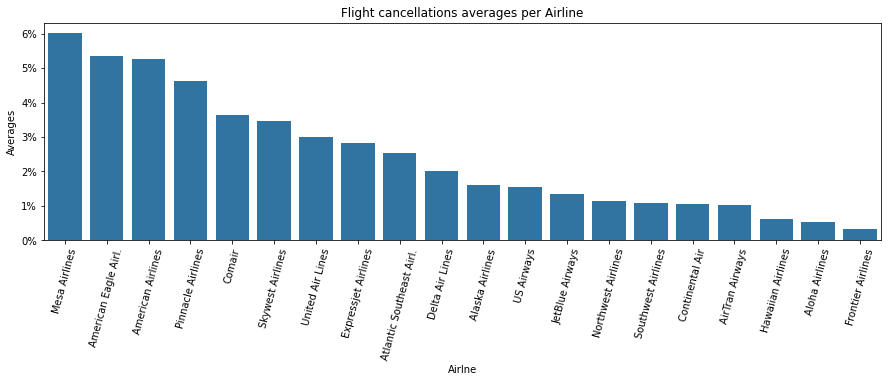

In [10]:
plt.figure(figsize=(15,4))
base_color = sb.color_palette()[0]

AvgCancellationsPerAirline = delays.groupby('UniqueCarrierFull').Cancelled.mean().sort_values(ascending = False)
sb.barplot(x=AvgCancellationsPerAirline.index,y=AvgCancellationsPerAirline.values,color=base_color)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
plt.xlabel('Airlne')
plt.xticks(rotation = 75)
plt.ylabel('Averages')
plt.title('Flight cancellations averages per Airline');

## Messa Airlines ranks first while Frontier Airlines last. 
##### It's worth mentioning Hawaiian and Aloha Airlines which are ranked very low as well.

# How do Days of Week compare on Flight Cancellation percentages?

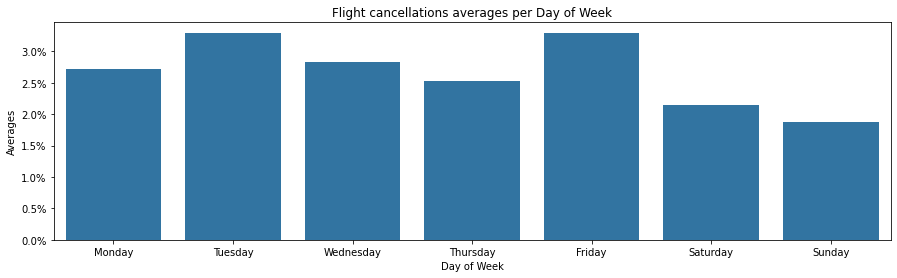

In [11]:
plt.figure(figsize=(15,4))

AvgCancellationsPerDoW = delays.groupby('DayOfWeek').Cancelled.mean()
sb.barplot(x=AvgCancellationsPerDoW.index,y=AvgCancellationsPerDoW.values,color=base_color)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals = 1))
plt.xlabel('Day of Week')
plt.ylabel('Averages')
plt.title('Flight cancellations averages per Day of Week');

## Friday ranks first with Tuesday being a close second!

# How do Days of Month compare on Flight Cancellation percentages?

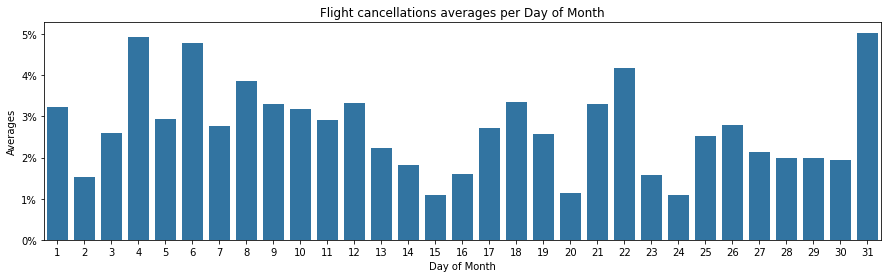

In [12]:
plt.figure(figsize=(15,4))

AvgCancellationsPerDoM = delays.groupby('DayofMonth').Cancelled.mean()

sb.barplot(x=AvgCancellationsPerDoM.index,y=AvgCancellationsPerDoM.values,color=base_color)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
plt.xlabel('Day of Month')
plt.ylabel('Averages')
plt.title('Flight cancellations averages per Day of Month');

## The 4th, 6th and 31st from each month have the most cancellations throughout the month.

##### 15th, 20th and 24th are worth mentioning as we find them in the lowest end of the days with flight cancellations.

# How do Origin Airports compare on Flight Cancellation percentages?

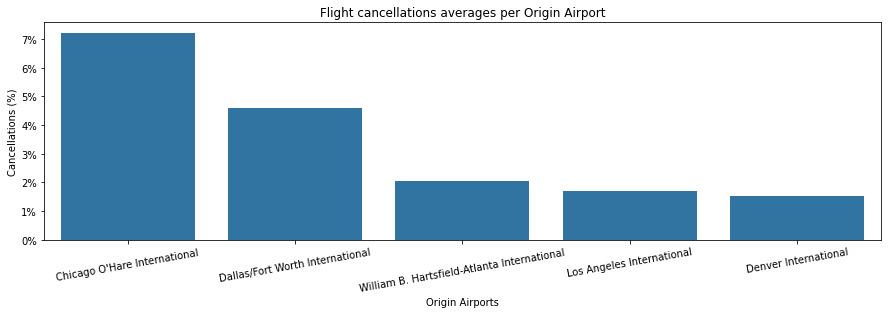

In [13]:
plt.figure(figsize=(15,4))

AvgCancellationsPerOrAirports = top_five_origin_airports.groupby('Origin').Cancelled.mean().sort_values(ascending = False)

sb.barplot(x=AvgCancellationsPerOrAirports.index,y=AvgCancellationsPerOrAirports.values,color=base_color);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
plt.xlabel('Origin Airports')
plt.xticks([0,1,2,3,4], ["Chicago O'Hare International", 'Dallas/Fort Worth International',
                         'William B. Hartsfield-Atlanta International', 'Los Angeles International',
                         'Denver International'], rotation = 10)
plt.ylabel('Cancellations (%)')
plt.title('Flight cancellations averages per Origin Airport');

## Chicago O'Hare International Airport is by far the Origin airport where the most flight cancellations happen.

# How do Destination Airports compare on Flight Cancellation percentages?

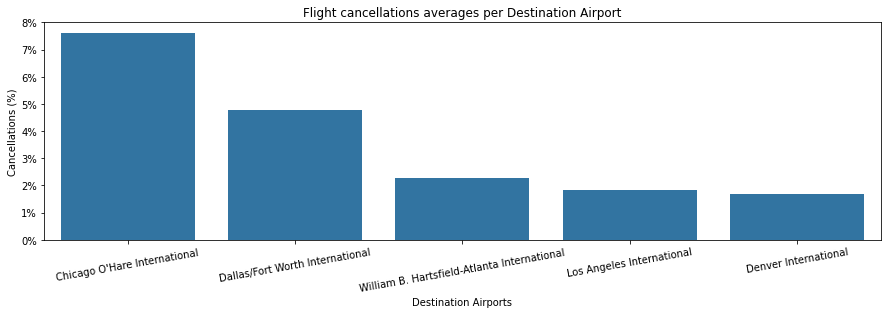

In [14]:
plt.figure(figsize=(15,4))

AvgCancellationsPerDestAirports = top_five_destination_airports.groupby('Dest').Cancelled.mean().sort_values(ascending = False)

sb.barplot(x=AvgCancellationsPerDestAirports.index,y=AvgCancellationsPerDestAirports.values,color=base_color);
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
plt.xlabel('Destination Airports')
plt.xticks([0,1,2,3,4], ["Chicago O'Hare International", 'Dallas/Fort Worth International',
                         'William B. Hartsfield-Atlanta International', 'Los Angeles International',
                         'Denver International'], rotation = 10)
plt.ylabel('Cancellations (%)')
plt.title('Flight cancellations averages per Destination Airport');

## Chicago O'Hare International Airport is by far the Destination airport where the most flight cancellations happen as well.

# How do Airlines compare on Flight Arrival Delay percentages?

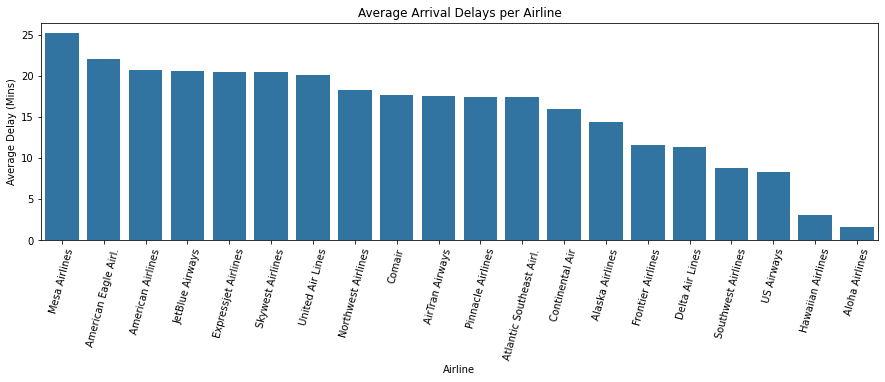

In [15]:
plt.figure(figsize=(15,4))

ArrivalDelaysPerAirline = delaysclean.groupby('UniqueCarrierFull').ArrDelay.mean().sort_values(ascending=False)

sb.barplot(x=ArrivalDelaysPerAirline.index,y=ArrivalDelaysPerAirline.values,color=base_color)
plt.xlabel('Airline')
plt.xticks(rotation = 75)
plt.ylabel('Average Delay (Mins)')
plt.title("Average Arrival Delays per Airline");

## Messa Airlines ranks first at the average arrival delays too, while Aloha Airlines last. 
##### Hawaiian Airlines is worth mentioning once again, as their arrival delay averages are pretty low too!

# How do Airlines compare on Flight Departure Delay percentages?

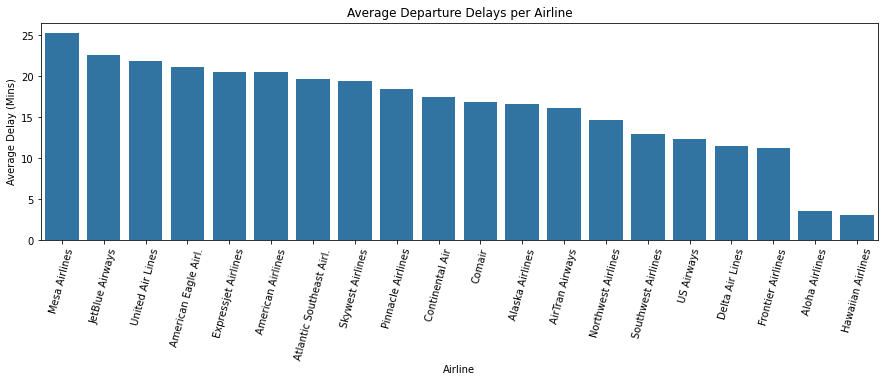

In [16]:
plt.figure(figsize=(15,4))

DepartureDelaysPerAirline = delaysclean.groupby('UniqueCarrierFull').DepDelay.mean().sort_values(ascending=False)

sb.barplot(x=DepartureDelaysPerAirline.index,y=DepartureDelaysPerAirline.values,color=base_color)
plt.xlabel('Airline')
plt.xticks(rotation = 75)
plt.ylabel('Average Delay (Mins)')
plt.title("Average Departure Delays per Airline");

## Almost same story on Departure delays with Messa Airlines being first and this time Hawaiian Airlines last.
##### Aloha airlines this time is worth mentioning as they have pretty low departure delays too!

# How do Days of Week compare on Flight Arrival Delay percentages?

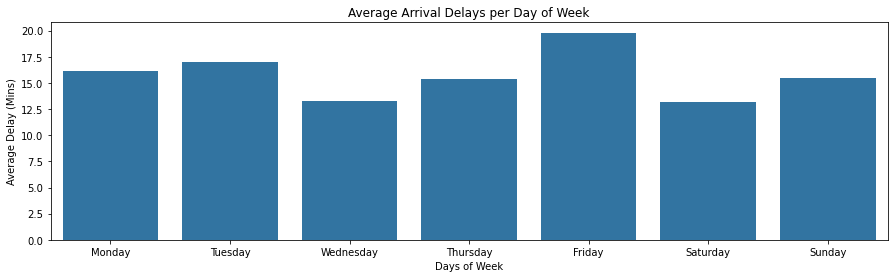

In [17]:
plt.figure(figsize=(15,4))

MeanArrDelaysPerDoW = delaysclean.groupby('DayOfWeek')['ArrDelay'].mean()

sb.barplot(x=MeanArrDelaysPerDoW.index,y=MeanArrDelaysPerDoW.values,color=base_color)
plt.xlabel('Days of Week')
plt.ylabel('Average Delay (Mins)')
plt.title('Average Arrival Delays per Day of Week');

## Fridays are ranked first in Arrival delays with Tuesdays being second.

# How do Days of Week compare on Flight Departure Delay percentages?

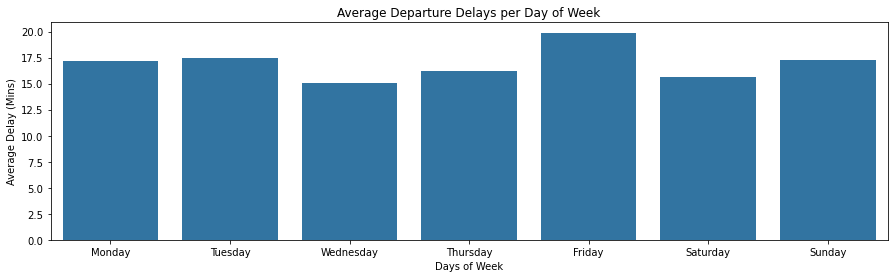

In [18]:
plt.figure(figsize=(15,4))

MeanDepDelaysPerDoW = delaysclean.groupby('DayOfWeek')['DepDelay'].mean()

sb.barplot(x=MeanDepDelaysPerDoW.index,y=MeanDepDelaysPerDoW.values,color=base_color)
plt.xlabel('Days of Week')
plt.ylabel('Average Delay (Mins)')
plt.title('Average Departure Delays per Day of Week');

## Fridays are ranked first in Departure delays as well.

# How do Days of Month compare on Flight Arrival Delay percentages?

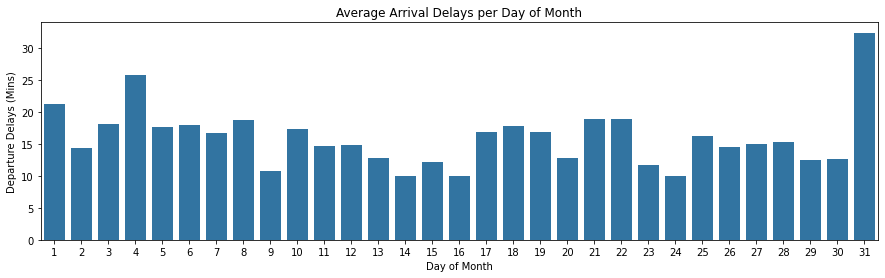

In [19]:
plt.figure(figsize=(15,4))

MeanArrDelaysPerDoM = delaysclean.groupby('DayofMonth')['ArrDelay'].mean()

sb.barplot(x=MeanArrDelaysPerDoM.index,y=MeanArrDelaysPerDoM.values,color=base_color)
plt.xlabel('Day of Month')
plt.ylabel('Departure Delays (Mins)')
plt.title('Average Arrival Delays per Day of Month');

## The 31st of each month has the highest average on Arrival delays throughout the whole month with the 4th being second.

# How do Days of Month compare on Flight Departure Delay percentages?

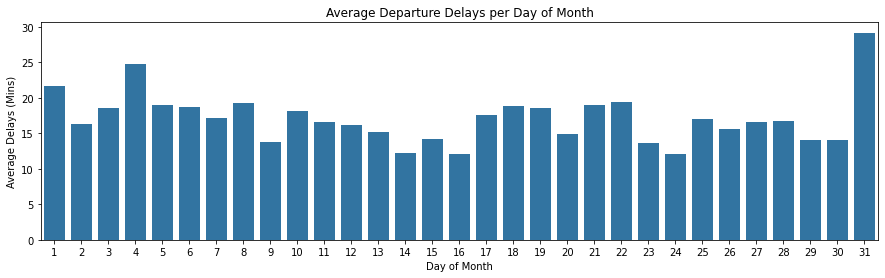

In [20]:
plt.figure(figsize=(15,4))

MeanDepDelaysPerDoM = delaysclean.groupby('DayofMonth')['DepDelay'].mean()

sb.barplot(x=MeanDepDelaysPerDoM.index,y=MeanDepDelaysPerDoM.values,color=base_color)
plt.xlabel('Day of Month')
plt.ylabel('Average Delays (Mins)')
plt.title('Average Departure Delays per Day of Month');

## The 31st of each month has the highest average in Departure delays throughout the whole month too. The 4th comes second here as well.

In [21]:
# Extract top five origin airports with most flights
origin_airport_flights = pd.Series(delaysclean.groupby('Origin')['Origin'].count())
origin_airport_flights = origin_airport_flights.sort_values(ascending=False)
top_five = origin_airport_flights.index[:5]

# Subset to the top 5 origin airports
top_five_origin_airports_sub = delaysclean[delaysclean['Origin'].isin(top_five)]

# Extract top five destination airports with most flights
destination_airport_flights = pd.Series(delaysclean.groupby('Dest')['Dest'].count())
destination_airport_flights = destination_airport_flights.sort_values(ascending=False)
top_five = destination_airport_flights.index[:5]

# Subset to the top 5 destination airports
top_five_destination_airports_sub = delaysclean[delaysclean['Dest'].isin(top_five)]

# How do Airlines compare on Flight Arrival Delay percentages?

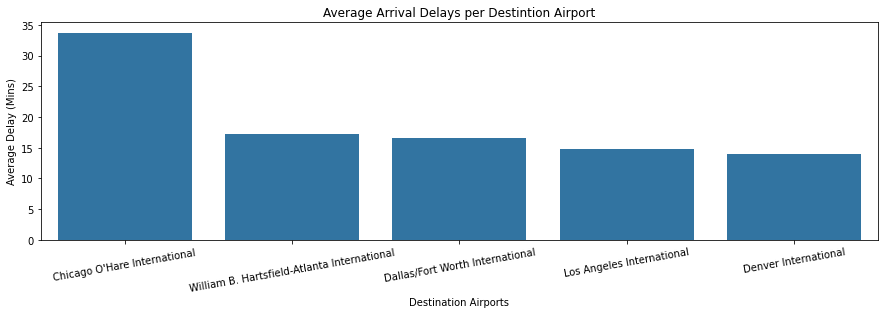

In [22]:
plt.figure(figsize=(15,4))

MeanDelayPerDestAirports = top_five_destination_airports_sub.groupby('Dest').ArrDelay.mean().sort_values(ascending = False)

sb.barplot(x=MeanDelayPerDestAirports.index,y=MeanDelayPerDestAirports.values,color=base_color)
plt.xlabel('Destination Airports')
plt.xticks([0,1,2,3,4], ["Chicago O'Hare International", 'William B. Hartsfield-Atlanta International', 
                         'Dallas/Fort Worth International', 'Los Angeles International', 'Denver International'],
           rotation = 10)
plt.ylabel('Average Delay (Mins)')
plt.title('Average Arrival Delays per Destintion Airport');

## Chicago O'Hare International Airport ranks first in Arrival delays as destination airport. This time the other four airports have much lower averages and are very close to each other.

# How do Airlines compare on Flight Departure Delay percentages?

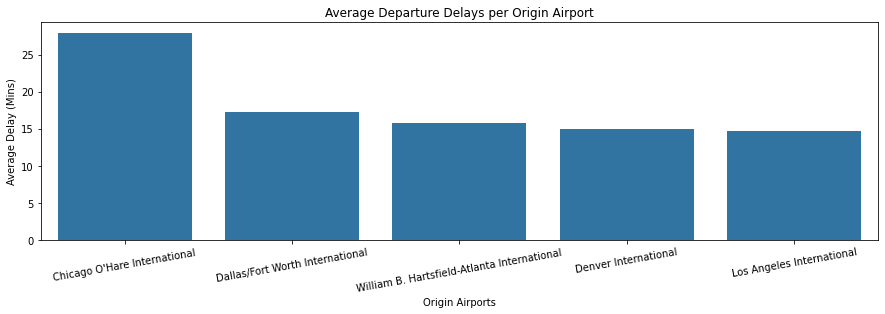

In [23]:
plt.figure(figsize=(15,4))

MeanDelayPerOrAirports = top_five_origin_airports_sub.groupby('Origin').DepDelay.mean().sort_values(ascending = False)

sb.barplot(x=MeanDelayPerOrAirports.index,y=MeanDelayPerOrAirports.values,color=base_color)
plt.xlabel('Origin Airports')
plt.xticks([0,1,2,3,4], ["Chicago O'Hare International", 'Dallas/Fort Worth International',
                         'William B. Hartsfield-Atlanta International', 'Denver International', 'Los Angeles International'], rotation = 10)
plt.ylabel('Average Delay (Mins)')
plt.title('Average Departure Delays per Origin Airport');

## Same picture in Departure delays per origin airports, as Chicago O'Hare International Airport ranks first with the other four airports being very close to each other.

In [24]:
PopTimes_mod = lambda x:((0,1)[x > 800],2)[x > 1600]
delaysclean['TimePopularityLvl'] = delaysclean['CRSDepTime'].apply(PopTimes_mod)

C:\Users\afled\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
ArrDelay_mod = lambda x:((0,1)[x > 5],2)[x > 60]
delaysclean['ArrDelayLevel'] = delaysclean['ArrDelay'].apply(ArrDelay_mod)

C:\Users\afled\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
DepDelay_mod = lambda x:((0,1)[x > 5],2)[x > 60]
delaysclean['DepDelayLevel'] = delaysclean['DepDelay'].apply(DepDelay_mod)

C:\Users\afled\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
delaysclean['TimePopularityLvl'] = delaysclean['TimePopularityLvl'].map({0:'Least Popular', 1:'Most Popular', 2:'2nd Most Popular'})
delaysclean['ArrDelayLevel'] = delaysclean['ArrDelayLevel'].map({0:'Minor Delay', 1:'Significant Delay', 2:'Major Delay'})
delaysclean['DepDelayLevel'] = delaysclean['DepDelayLevel'].map({0:'Minor Delay', 1:'Significant Delay', 2:'Major Delay'})


TimePopTypes = ['Most Popular', '2nd Most Popular', 'Least Popular']   
Ordered_TimePop_Type = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = TimePopTypes)
delaysclean['TimePopularityLvl'] = delaysclean['TimePopularityLvl'].astype(Ordered_TimePop_Type)

DelayTypes = ['Minor Delay', 'Significant Delay', 'Major Delay']   
Ordered_Delay_Type = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = DelayTypes)

delaysclean['TimePopularityLvl'] = delaysclean['TimePopularityLvl'].astype(Ordered_TimePop_Type)
delaysclean['ArrDelayLevel'] = delaysclean['ArrDelayLevel'].astype(Ordered_Delay_Type)
delaysclean['DepDelayLevel'] = delaysclean['DepDelayLevel'].astype(Ordered_Delay_Type)

C:\Users\afled\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\afled\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\afled\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

# How do different Flight times compare on different levels of Flight Arrival Delays?

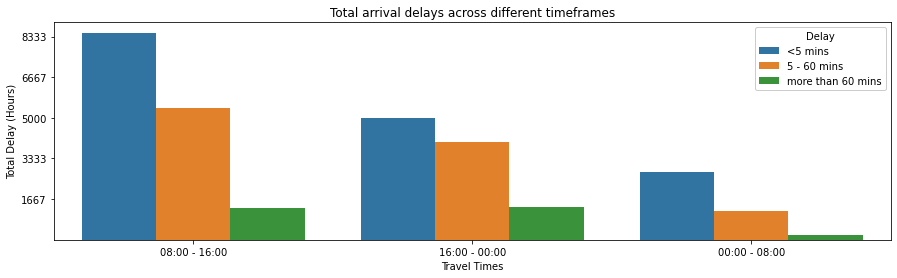

In [28]:
plt.figure(figsize=(15,4))

position = [0,1,2]
names = ['08:00 - 16:00', '16:00 - 00:00', '00:00 - 08:00' ]
yposition = [100000, 200000, 300000, 400000, 500000]
ynames = [round(i/60) for i in yposition]

sb.countplot(data = delaysclean, x = 'TimePopularityLvl', hue = 'ArrDelayLevel')
plt.xlabel('Travel Times')
plt.ylabel('Total Delay (Hours)')
plt.xticks(position, names)
plt.yticks(yposition, ynames)
plt.title('Total arrival delays across different timeframes')
plt.legend(title='Delay', loc=1, labels=['<5 mins', '5 - 60 mins', 'more than 60 mins'],framealpha = 1);

## Flights that took place between 8am and 4pm, had the most Minor and Significant arrival delays. Flights that took place between 4pm and 12pm, were second in these delay levels but first in Major delays. However, the difference in Major delays is tiny small. 

### Flights that took place between 12am and 8am had the least arrival delays overall.

# How do different Flight times compare on different levels of Flight Departure Delays?

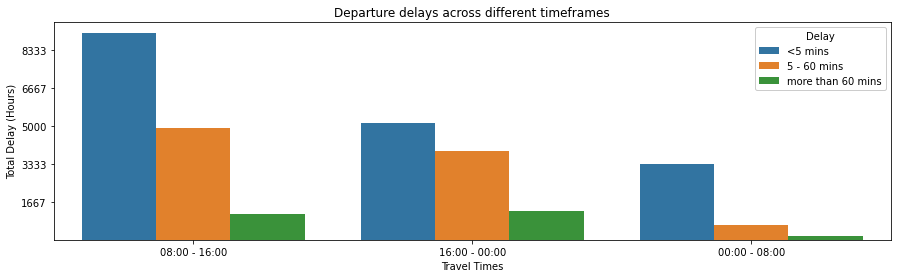

In [29]:
plt.figure(figsize=(15,4))

position = [0,1,2]
names = ['08:00 - 16:00', '16:00 - 00:00', '00:00 - 08:00' ]
yposition = [100000, 200000, 300000, 400000, 500000]
ynames = [round(i/60) for i in yposition]

sb.countplot(data = delaysclean, x = 'TimePopularityLvl', hue = 'DepDelayLevel')
plt.xlabel('Travel Times')
plt.ylabel('Total Delay (Hours)')
plt.xticks(position, names)
plt.yticks(yposition, ynames)
plt.title('Departure delays across different timeframes')
plt.xticks(position, names)
plt.legend(title='Delay', loc=1, labels=['<5 mins', '5 - 60 mins', 'more than 60 mins'],framealpha = 1);

## Same picture with the Departure delays as well. 
## Flights that took place between 8am and 4pm, had the most Minor and Significant delays. Flights that took place between 4pm and 12pm, were second in the same delay levels, but first in Major delays. Once again, the difference in Major delays is tiny small.

### Flights that took place between 12am and 8am had the least arrival delays overall.

In [30]:
! jupyter nbconvert ProjectPresentation.ipynb --to slides --post serve --template output-toggle

[NbConvertApp] Converting notebook ProjectPresentation.ipynb to slides
[NbConvertApp] Writing 750889 bytes to ProjectPresentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\afled\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\afled\Anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\afled\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\afled\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\afled\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File